In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load the data ---
df = pd.read_csv("weather_forecast_data.csv")

# --- Step 2: Encode the target column ---
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})

# Step 3: Feature Engineering ---

# Ratios and interactions
df['Temp_Humidity_Ratio'] = df['Temperature'] / (df['Humidity'] + 1e-6)
df['Pressure_Drop_Risk'] = 1000 - df['Pressure']
df['Feels_Like_Index'] = 0.7 * df['Temperature'] + 0.3 * df['Humidity']

# Binary flags
df['Is_Cloudy'] = (df['Cloud_Cover'] > 50).astype(int)
df['High_Humidity'] = (df['Humidity'] > 85).astype(int)

# Moving Averages (3-period)
df['Temperature_MA3'] = df['Temperature'].rolling(window=3).mean()
df['Humidity_MA3'] = df['Humidity'].rolling(window=3).mean()
df['Pressure_MA3'] = df['Pressure'].rolling(window=3).mean()
df['Cloud_Cover_MA3'] = df['Cloud_Cover'].rolling(window=3).mean()

# Rolling standard deviations (optional)
df['Humidity_STD3'] = df['Humidity'].rolling(window=3).std()
df['Pressure_STD3'] = df['Pressure'].rolling(window=3).std()

# Drop rows with NaNs caused by rolling operations
df.dropna(inplace=True)

# --- Step 4: Split into features and target ---
X = df.drop('Rain', axis=1)
y = df['Rain']

# --- Step 5: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Fit Random Forest ---
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
model.fit(X_train, y_train)

# --- Step 7: Predict and Evaluate ---
y_pred = model.predict(X_test)

# Accuracy and report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))




✅ Accuracy: 0.97

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       425
           1       1.00      0.83      0.91        75

    accuracy                           0.97       500
   macro avg       0.99      0.91      0.95       500
weighted avg       0.97      0.97      0.97       500



# **Cross validation**

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated Accuracy:", scores.mean())


Cross-validated Accuracy: 0.977982364729459


# **feature importance**

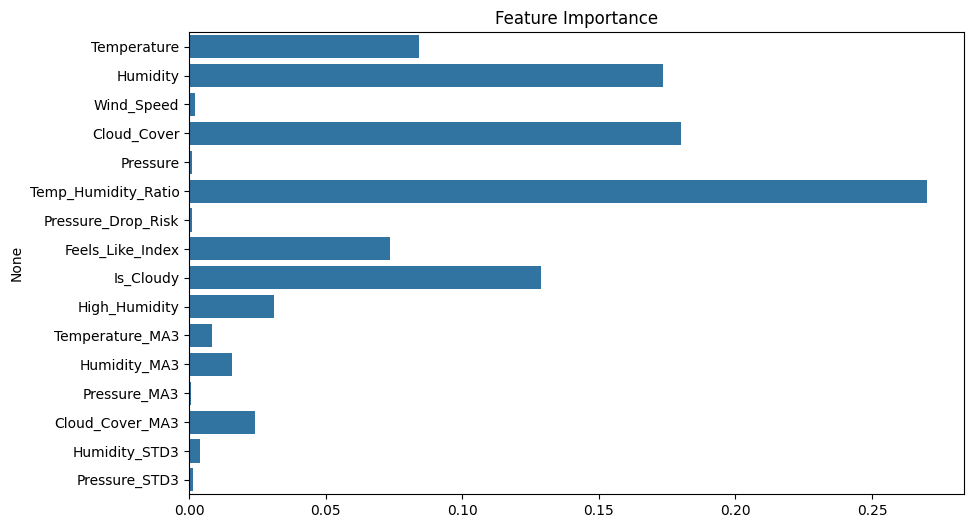

In [11]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


# **test data set**

In [12]:
# --- Step 1: Load test data ---
test_df = pd.read_csv("weather_forecast_test_data.csv")

# --- Step 2: Encode the target column ---
test_df['Rain'] = test_df['Rain'].map({'no rain': 0, 'rain': 1})

# --- Step 3: Apply same feature engineering as training ---

# Ratios and interactions
test_df['Temp_Humidity_Ratio'] = test_df['Temperature'] / (test_df['Humidity'] + 1e-6)
test_df['Pressure_Drop_Risk'] = 1000 - test_df['Pressure']
test_df['Feels_Like_Index'] = 0.7 * test_df['Temperature'] + 0.3 * test_df['Humidity']

# Binary flags
test_df['Is_Cloudy'] = (test_df['Cloud_Cover'] > 50).astype(int)
test_df['High_Humidity'] = (test_df['Humidity'] > 85).astype(int)

# Rolling stats (3-period)
test_df['Temperature_MA3'] = test_df['Temperature'].rolling(window=3).mean()
test_df['Humidity_MA3'] = test_df['Humidity'].rolling(window=3).mean()
test_df['Pressure_MA3'] = test_df['Pressure'].rolling(window=3).mean()
test_df['Cloud_Cover_MA3'] = test_df['Cloud_Cover'].rolling(window=3).mean()
test_df['Humidity_STD3'] = test_df['Humidity'].rolling(window=3).std()
test_df['Pressure_STD3'] = test_df['Pressure'].rolling(window=3).std()

# Drop rows with NaNs caused by rolling
test_df.dropna(inplace=True)

# --- Step 5: Split into features and target ---
X_test = test_df.drop('Rain', axis=1)
y_test = test_df['Rain']

# --- Step 6: Predict and Evaluate ---
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.2f}")
print("\n📊 Test Classification Report:")
print(classification_report(y_test, y_pred))


✅ Test Accuracy: 0.99

📊 Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.98      0.90      0.94        62

    accuracy                           0.99       498
   macro avg       0.98      0.95      0.97       498
weighted avg       0.99      0.99      0.99       498

